In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

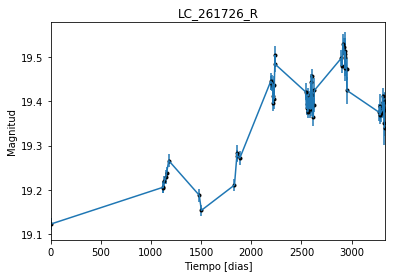

In [2]:
data = np.genfromtxt('LC_261726_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_261726_R')
plt.savefig("LC_261726_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

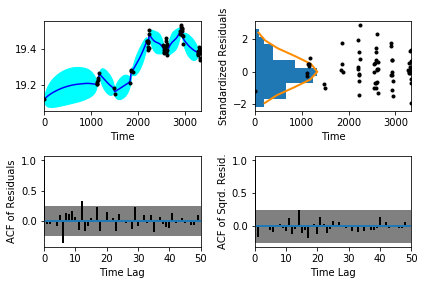

In [5]:
sample.assess_fit()

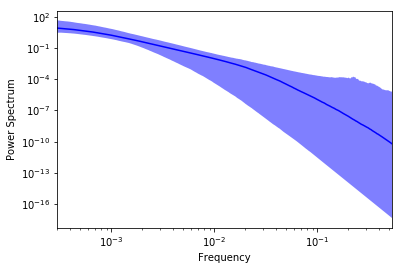

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

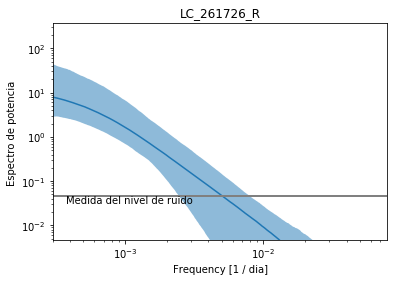

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_261726_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_261726_R')

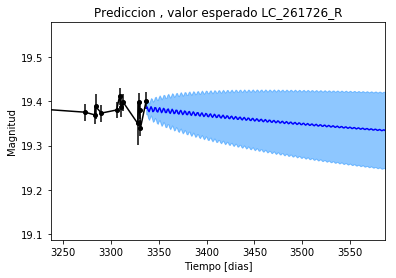

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_261726_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_261726_R')

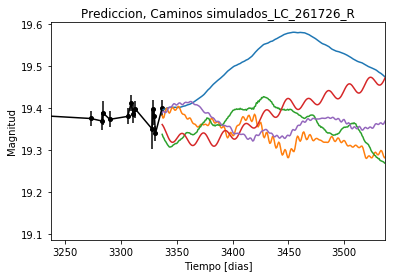

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_261726_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


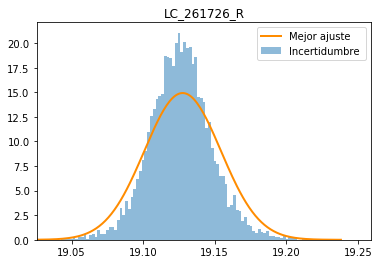

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_261726_R')
plt.savefig("Mejor_ajuste_LC_261726_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_261726_R')

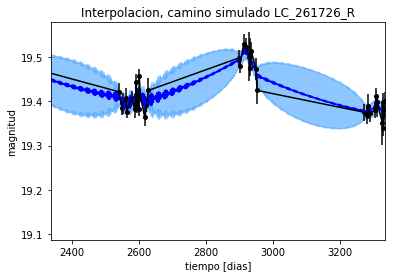

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_R')

Text(0.5,1,'Interpolacion, camino simulado LC_261726_R')

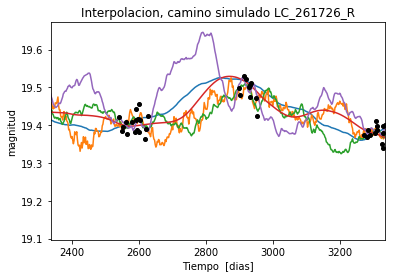

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 380.181566633
Median: 0.0198636837468
Standard deviation: 0.220233995145
68% credibility interval: [ 0.00167004  0.26385623]
95% credibility interval: [  4.00731541e-04   8.40323492e-01]
99% credibility interval: [  3.13942403e-04   1.02340723e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 362.953424328
Median: 0.00479478180204
Standard deviation: 0.110989607149
68% credibility interval: [ 0.00050546  0.05644535]
95% credibility interval: [  3.21094039e-04   3.82608215e-01]
99% credibility interval: [  3.03935749e-04   7.60123968e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 400.936913763
Median: 0.034948269754
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 400.033390478
Median: 151.843720588
Standard deviation: 1.99932209468
68% credibility interval: [ 149.67566518  153.71844761]
95% credibility interval: [ 147.23591257  154.73282113]
99% credibility interval: [ 145.22491643  155.50629421]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 359.775980723
Median: 0.898365767707
Standard deviation: 2.61994870325
68% credibility interval: [ 0.0845187   4.89662139]
95% credibility interval: [ 0.0158552   9.02786452]
99% credibility interval: [  1.07381709e-02   1.18025795e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 284.335100286
Median: 1.68238097956
Standard deviation: 11.7874519999
68% credibility interval: [  0.04676413  14.33445584]
95% credibility interval: [  3.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0597795
Median: 3.12988736685e-49
Standard deviation: 2.74828728831e+132
68% credibility interval: [  8.14762703e-88   1.73458882e-13]
95% credibility interval: [  1.60791998e-193   3.27378800e+000]
99% credibility interval: [  2.94944280e-238   5.38580655e+047]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2326.44296409
Median: 19.2897093732
Standard deviation: 0.0701351800726
68% credibility interval: [ 19.22723437  19.34953182]
95% credibility interval: [ 19.14736183  19.41942114]
99% credibility interval: [ 19.06434161  19.49386003]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 377.690668414
Median: 0.0428626422117
Standard deviation: 0.273967728553
68% credibility interval: [ 0.          0.48519552]
95% credibility interval: [ 0.          0.94464316]
99% credibility interval: [ 0.         1.0327246]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 377.690668414
Median: 0.0428626422117
Standard deviation: 0.273967728553
68% credibility interval: [ 0.          0.48519552]
95% credibility interval: [ 0.          0.94464316]
99% credibility interval: [ 0.         1.0327246]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 740.080731411
Median: 0.0
Standard deviation: 0.000170092725095
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 400.033390478
Median: 151.843720588
Standard deviation: 1.99932209468
68% credibility interval: [ 149.67566518  153.71844761]
95% credibility interval: [ 147.23591257  154.73282113]
99% credibility interval: [ 145.22491643  155.50629421]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 649.876514649
Median: 0.0152882564493
Standard deviation: 0.0199172095266
68% credibility interval: [ 0.00942998  0.02895088]
95% credibility interval: [ 0.00670006  0.07191266]
99% credibility interval: [ 0.00557392  0.12832796]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1747.1806293
Median: 1.16109972755
Standard deviation: 0.218954605181
68% credibility interval: [ 0.96670062  1.39827049]
95% credibility interval: [ 0.79391087  1.66043546]
99% credibility interval: [ 0.71584444  1.82776308]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 318.142102721
Median: 0.000815132585671
Standard deviation: 0.140563441287
68% credibility interval: [  7.51296069e-06   2.75014052e-02]
95% credibility interval: [  1.01743940e-07   4.06969324e-01]
99% credibility interval: [  2.82801489e-49   1.08226404e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 380.181566633
Median: (-0.124807205864-0.828201109013j)
Standard deviation: 2.20862077829
68% credibility interval: [-1.65785759+0.j         -0.01049318-1.45060764j]
95% credibility interval: [ -5.27990822e+00-5.3835964j   -2.51787053e-03-0.08206659j]
99% credibility interval: [ -6.43025727e+00+0.j          -1.97255829e-03-0.00187821j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 362.953424328
Median: (-0.0301265025697+2.1917148659j)
Standard deviation: 1.85728459251
68% credibility interval: [-0.35465658+0.j -0.00317591+0.j]
95% credibility interval: [ -2.40399832e+00+1.73131255j  -2.01749335e-03+0.j        ]
99% credibility interval: [ -4.77599975e+00+5.13003627j  -1.90968463e-03+6.2409261j ]
Posterior summary for